In [1]:
import numpy as np
import os
import time
import random
import torch
from Model import Market_Env


from TD3 import utils
from TD3 import TD3
from TD3 import OurDDPG
from TD3 import DDPG


In [2]:
model_file = r"./models/DDPG_600"
fund_return_src = r'./data/Monthly_Fund_Return_Selected.csv'
feature_src = r'./data/FEATURE.csv'
fund_map_src =r'./data/FUND_MAP_SELECTED.csv'

env =Market_Env(feature_src,fund_map_src,fund_return_src)

# Set seeds
rand_seed =random.randint(0x00000000,0xFFFFFFFF)
env.seed(rand_seed)
torch.manual_seed(rand_seed)
np.random.seed(rand_seed)

state_dim = env.state_dim
action_dim = env.action_dim
max_action = env.max_action


kwargs = {
    "state_dim": state_dim,
    "action_dim": action_dim,
    "max_action": max_action,
    "discount": 0.9,
    "tau": 0.005,
}


policy_name="DDPG"

if (policy_name=="TD3"):
    kwargs["policy_noise"] = policy_noise * max_action
    kwargs["noise_clip"] = noise_clip * max_action
    kwargs["policy_freq"] = policy_freq
    policy = TD3.TD3(**kwargs)
    policy.load(model_file)
elif(policy_name=="DDPG"):
    policy = OurDDPG.DDPG(**kwargs)
    policy.load(model_file)


In [3]:
state, done = env.reset(validation=True), False
while not done:
    action = policy.select_action(np.array(state))
    action = action+0*np.random.randn(len(action))
    state, reward, done = env.step(action)
    #print(reward)
    time.sleep(.1)
print(env.profilios)
profilios = env.profilios
print (profilios[0])

[[('LU0063729296', 0.16681435478200374), ('HK0000055670', 0.16608616780910265), ('LU0125948108', 0.1670274845833951), ('LU0095024591', 0.16630205359167166), ('LU0132282301', 0.1669899360600034), ('US4642874329', 0.16678000317382352)], [('LU0063729296', 0.16598437981218722), ('HK0000055670', 0.16619062858860906), ('LU0095024591', 0.16704372463104106), ('LU0132282301', 0.1671124786864348), ('LU0345768823', 0.16667557671020816), ('US4642874329', 0.16699321157151964)], [('HK0000055670', 0.16725057349989217), ('US4642864007', 0.16635757553168803), ('LU0132282301', 0.16643074935048643), ('LU0345768823', 0.16653555482019022), ('TW000T1602Y9', 0.16676297193581527), ('US4642874329', 0.16666257486192795)], [('HK0000055670', 0.1667006480680059), ('LU0125948108', 0.16647078065759666), ('LU0095024591', 0.1663500595334147), ('LU0224105477', 0.16742848203424307), ('TW000T1602Y9', 0.16663398318180128), ('US4642874329', 0.16641604652493827)], [('HK0000055670', 0.16672420395724818), ('LU0095024591', 0.1

In [4]:
print (len(profilios[0]))

6


In [5]:
import random


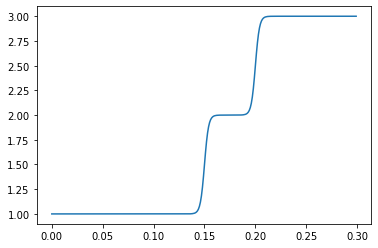

In [34]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0,0.3,0.001)   # start,stop,step
y = 1+1/(1+np.exp(-(x-0.15)*500))+1/(1+np.exp(-(x-0.2)*500))
plt.plot(x,y)

In [35]:
x=5
1+1/(1+np.exp(-(x-0.15)*500))+1/(1+np.exp(-(x-0.2)*500))

3.0